In [1]:
from eda_imports import *

# Read unnormalized RSEM count data

### First example

In [34]:
# use this barcode as an example for demonstration
the_barcode = 'TCGA-KN-8418-01A-11R-2315-07'

In [39]:
df1 = pd.read_csv('data/gdac.broadinstitute.org_KICH.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0/KICH.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.data.txt', 
                  usecols=['Hybridization REF', the_barcode],
                  low_memory=False,
                  sep='\t')

df1.drop(0, inplace=True)  # remove the row with all "raw_count" text
df1.set_index(df1['Hybridization REF'].values, inplace=True)
df1.drop('Hybridization REF', axis=1, inplace=True)

# Read RSEM normalized count data

In [40]:
df2 = pd.read_csv('data/gdac.broadinstitute.org_KICH.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0/KICH.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', 
                  usecols=['Hybridization REF', the_barcode],
                  low_memory=False,
                  sep='\t')

df2.drop(0, inplace=True)  # remove the row with all "raw_count" text
df2.set_index(df2['Hybridization REF'].values, inplace=True)
df2.drop('Hybridization REF', axis=1, inplace=True)

In [41]:
df1 = df1.astype(float).rename(columns={the_barcode: 'unnormed'})
df2 = df2.astype(float).rename(columns={the_barcode: 'normed'})

In [42]:
df1.head().T

?|100130426  ?|100133144  ?|100134869  ?|10357  ?|10431
unnormed  0.0          31.98        34.02        176.22   2275.0

In [43]:
df2.head().T

?|100130426  ?|100133144  ?|100134869  ?|10357   ?|10431
normed  0.0          10.8591      11.5518      59.837   772.4958

In [44]:
ndf = pd.concat([df1, df2], axis=1)

# Confirm linear relationship between unnormalized and normalized data

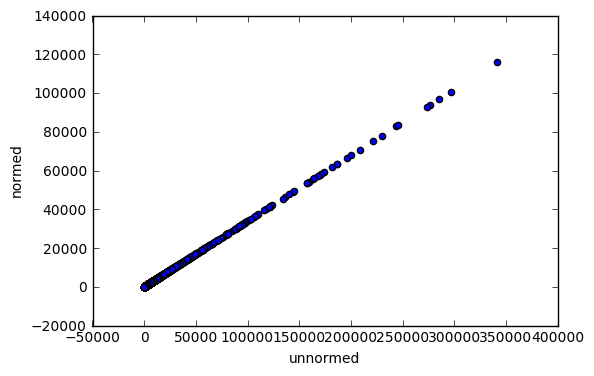

In [45]:
ndf.plot.scatter(x='unnormed', y='normed')

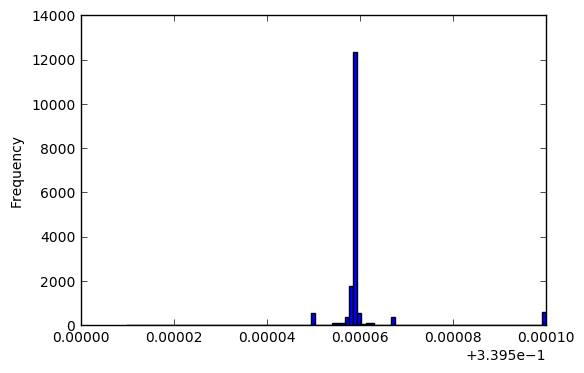

In [46]:
(ndf['normed'] / ndf['unnormed']).dropna().plot.hist(bins=100)

In [48]:
(ndf['normed'] / ndf['unnormed']).mean()

0.33955997109597363

This illustrates what it means by 

>RSEM expression estimates are normalized to set the upper quartile count at 1000 for gene level and 300 for isoform level estimates. These files have two columns, feature name and normalized count

at https://confluence.broadinstitute.org/download/attachments/29790363/DESCRIPTION.txt?version=1&modificationDate=1363806109000

In [49]:
ndf[ndf['unnormed'] > 0].describe().T['75%']

unnormed    2943.0000
normed      999.3209 
Name: 75%, dtype: float64

So after all, normalization is just a linear transformation to scale the upper quantile to be at 1000

# Try another example barcode

In [31]:
# use this barcode as an example for demonstration
the_barcode = 'TCGA-KL-8330-01A-11R-2315-07'

df1 = pd.read_csv('data/gdac.broadinstitute.org_KICH.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0/KICH.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.data.txt', 
                  usecols=['Hybridization REF', the_barcode],
                  low_memory=False,
                  sep='\t')

df1.drop(0, inplace=True)  # remove the row with all "raw_count" text
df1.set_index(df1['Hybridization REF'].values, inplace=True)
df1.drop('Hybridization REF', axis=1, inplace=True)

df2 = pd.read_csv('data/gdac.broadinstitute.org_KICH.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0/KICH.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', 
                  usecols=['Hybridization REF', the_barcode],
                  low_memory=False,
                  sep='\t')

df2.drop(0, inplace=True)  # remove the row with all "raw_count" text
df2.set_index(df2['Hybridization REF'].values, inplace=True)
df2.drop('Hybridization REF', axis=1, inplace=True)

df1 = df1.astype(float).rename(columns={the_barcode: 'unnormed'})
df2 = df2.astype(float).rename(columns={the_barcode: 'normed'})

ndf = pd.concat([df1, df2], axis=1)

In [50]:
(ndf['normed'] / ndf['unnormed']).describe()

count    17178.000000
mean     0.339560    
std      0.000008    
min      0.339510    
25%      0.339559    
50%      0.339559    
75%      0.339559    
max      0.339600    
dtype: float64

In [30]:
ndf[ndf['unnormed'] > 0].describe().T['75%']

unnormed    3060.0000
normed      999.6733 
Name: 75%, dtype: float64